In [1]:
import matplotlib.pyplot as plt
import geopandas
import numpy as np

In [2]:
import cartopy.crs as ccrs
import numpy as np

def scale_bar(ax, length=None, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length: 
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)        
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length) 

    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbx, sby, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom')

In [3]:
sigmine = geopandas.read_file("RS/RS.shp")

In [4]:
sigmine['FASE'].unique()

array(['CONCESSÃO DE LAVRA', 'AUTORIZAÇÃO DE PESQUISA',
       'REQUERIMENTO DE LAVRA', 'DIREITO DE REQUERER A LAVRA',
       'LICENCIAMENTO', 'REQUERIMENTO DE PESQUISA',
       'REQUERIMENTO DE LICENCIAMENTO',
       'REQUERIMENTO DE LAVRA GARIMPEIRA', 'DISPONIBILIDADE',
       'LAVRA GARIMPEIRA', 'REQUERIMENTO DE REGISTRO DE EXTRAÇÃO',
       'REGISTRO DE EXTRAÇÃO'], dtype=object)

In [5]:
filtro_req1 = sigmine['FASE'] != 'REQUERIMENTO DE PESQUISA'
filtro_req2 = sigmine['FASE'] != 'REQUERIMENTO DE LICENCIAMENTO'
filtro_req3 = sigmine['FASE'] != 'REQUERIMENTO DE LAVRA GARIMPEIRA'
filtro_req4 = sigmine['FASE'] != 'REQUERIMENTO DE REGISTRO DE EXTRAÇÃO'

sigmine = sigmine[filtro_req1 & filtro_req2 & filtro_req3 & filtro_req4]

In [6]:
filtro_n_cad = sigmine['SUBS'] != 'DADO NÃO CADASTRADO'
sigmine = sigmine[filtro_n_cad]

In [7]:
len(sigmine)

8557

In [8]:
sigmine.head()

,PROCESSO,ID,NUMERO,ANO,AREA_HA,FASE,ULT_EVENTO,NOME,SUBS,USO,UF,geometry
0,2839/1935,{01BC40B2-0EBF-4DE5-A501-101C275BA993},2839,1935,2346.20,CONCESSÃO DE LAVRA,473 - CONC LAV/CUMPRIMENTO EXIGÊNCIA PROTOCOLI...,COPELMI MINERAÇÃO LTDA,ARGILA,Não informado,RS,"POLYGON Z ((-52.03240 -30.14235 0.00000, -52.0..."
1,2122/1936,{94B1C54F-BD58-4764-9E1D-C4C396FAE042},2122,1936,1778.30,CONCESSÃO DE LAVRA,436 - CONC LAV/DOCUMENTO DIVERSO PROTOCOLIZADO...,Luzia Jurema Vidal de Souza,CHUMBO,Não informado,RS,"POLYGON Z ((-53.90409 -30.81146 0.00000, -53.9..."
2,212201/1936,{F5843416-9EB6-42AE-8762-A3B83163FEC7},212201,1936,1064.87,CONCESSÃO DE LAVRA,436 - CONC LAV/DOCUMENTO DIVERSO PROTOCOLIZADO...,Luzia Jurema Vidal de Souza,CHUMBO,Não informado,RS,"POLYGON Z ((-53.84127 -30.82963 0.00000, -53.8..."
3,4632/1938,{994E7002-29BC-4CF3-BD14-05F333545B21},4632,1938,98.01,CONCESSÃO DE LAVRA,536 - CONC LAV/TRANSF DIREITOS -DISTRATO PROTO...,Comican Companhia de Mineração Candiota,CALCÁRIO,Não informado,RS,"POLYGON Z ((-52.93207 -32.03117 0.00000, -52.9..."
4,2942/1939,{1B49D2DE-1FFE-44DE-8C72-53B53E5A7187},2942,1939,1083.84,CONCESSÃO DE LAVRA,436 - CONC LAV/DOCUMENTO DIVERSO PROTOCOLIZADO...,Companhia Riograndense de Mineração,CARVÃO,Não informado,RS,"POLYGON Z ((-52.04240 -30.12647 0.00000, -52.0..."


In [9]:
for i in sigmine['SUBS'].unique():
    f = sigmine['SUBS'] == i
    d = sigmine[f]
    print(i,d['USO'].unique())

ARGILA ['Não informado' 'Industrial' 'Construção civil' 'Cerâmica vermelha']
CHUMBO ['Não informado']
CALCÁRIO ['Não informado' 'Brita' 'Fabricação de cimento' 'Industrial'
 'Fabricação de cal' 'Corretivo de solo']
CARVÃO ['Não informado' 'Industrial' 'Energético']
ÁGUA MINERAL ALC. BIC ['Não informado']
ÁGUA MINERAL ['Não informado' 'Engarrafamento' 'Industrial' 'Balneoterapia']
AREIA ['Construção civil' 'Não informado' 'Industrial']
COBRE ['Não informado' 'Industrial']
TALCO ['Não informado']
CAULIM ['Não informado' 'Cerâmica vermelha' 'Industrial']
CASCALHO ['Não informado' 'Construção civil' 'Revestimento' 'Brita']
CALCÁRIO DOLOMÍTICO ['Não informado' 'Corretivo de solo' 'Fabricação de cal']
QUARTZO ['Não informado' 'Artesanato  mineral']
OURO ['Não informado' 'Ourivesaria' 'Industrial']
GRANITO ['Não informado' 'Construção civil' 'Industrial' 'Brita' 'Revestimento'
 'Pedra de talhe']
FOLHELHO PIROBETUMINO ['Não informado']
SAPROPELITO ['Não informado']
LINHITO ['Não informado']
BE

In [10]:
f_const_civil = sigmine['USO'] == 'Construção civil'
f_cimento = sigmine['USO'] == 'Fabricação de cimento'
f_brita = sigmine['USO'] == 'Brita'
f_revest = sigmine['USO'] == 'Revestimento'
f_entalhe = sigmine['USO'] == 'Pedra de talhe'
civil = sigmine[f_const_civil | f_cimento | f_brita | f_revest | f_entalhe]

In [11]:
grupos = {'Materiais para construção civil':civil,
         }

In [12]:
municipios = geopandas.read_file('municipios/Municipios_IBGE.shp')

In [13]:
municipios.head()

,MSLINK,MAPID,AREA_1,PERIMETRO_,NOME,SEDE,LATITUDESE,LONGITUDES,AREA_TOT_G,Cod_ibge,Label_N,geometry
0,4985,99,118.280,61.626,HERVEIRAS,1,-29.407,-52.653,118.280,4309571,Herveiras,"POLYGON ((-52.77319 -29.44486, -52.77602 -29.4..."
1,4986,99,228.849,81.715,HORIZONTINA,1,-27.626,-54.308,228.849,4309605,Horizontina,"POLYGON ((-54.39910 -27.57012, -54.38675 -27.5..."
2,4987,99,822.943,184.883,HULHA NEGRA,1,-31.404,-53.869,822.943,4309654,Hulha Negra,"POLYGON ((-53.98933 -31.55208, -53.99221 -31.5..."
3,4988,99,135.246,70.392,HUMAITA,1,-27.563,-53.974,135.246,4309704,Humaitá,"POLYGON ((-54.07227 -27.57674, -54.06089 -27.5..."
4,4989,99,193.109,70.655,IBARAMA,1,-29.419,-53.135,193.109,4309753,Ibarama,"POLYGON ((-53.26582 -29.44975, -53.26701 -29.4..."


In [14]:
for grupo in grupos:
    municipios[grupo] = np.ones(len(municipios)) * float('nan')
    geometrias = grupos[grupo]['geometry'].to_crs("EPSG:4326")
    centroides = geometrias.centroid
    for index, row in municipios.iterrows():
        poly = row['geometry']
        count = 0
        for p in centroides:
            if p.within(poly):
                count = count + 1
        #print(row['NOME'], mineral, count)
        municipios.at[index, grupo] = int(count)

C:\Users\robertomr\Documents\Python\WPy64-3760\python-3.7.6.amd64\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [15]:
municipios.head()

,MSLINK,MAPID,AREA_1,PERIMETRO_,NOME,SEDE,LATITUDESE,LONGITUDES,AREA_TOT_G,Cod_ibge,Label_N,geometry,Materiais para construção civil
0,4985,99,118.280,61.626,HERVEIRAS,1,-29.407,-52.653,118.280,4309571,Herveiras,"POLYGON ((-52.77319 -29.44486, -52.77602 -29.4...",3.0
1,4986,99,228.849,81.715,HORIZONTINA,1,-27.626,-54.308,228.849,4309605,Horizontina,"POLYGON ((-54.39910 -27.57012, -54.38675 -27.5...",36.0
2,4987,99,822.943,184.883,HULHA NEGRA,1,-31.404,-53.869,822.943,4309654,Hulha Negra,"POLYGON ((-53.98933 -31.55208, -53.99221 -31.5...",2.0
3,4988,99,135.246,70.392,HUMAITA,1,-27.563,-53.974,135.246,4309704,Humaitá,"POLYGON ((-54.07227 -27.57674, -54.06089 -27.5...",3.0
4,4989,99,193.109,70.655,IBARAMA,1,-29.419,-53.135,193.109,4309753,Ibarama,"POLYGON ((-53.26582 -29.44975, -53.26701 -29.4...",4.0


In [16]:
grupos_m = municipios.columns[12:]
#minerais = [municipios.columns[14]]

Materiais para construção civil


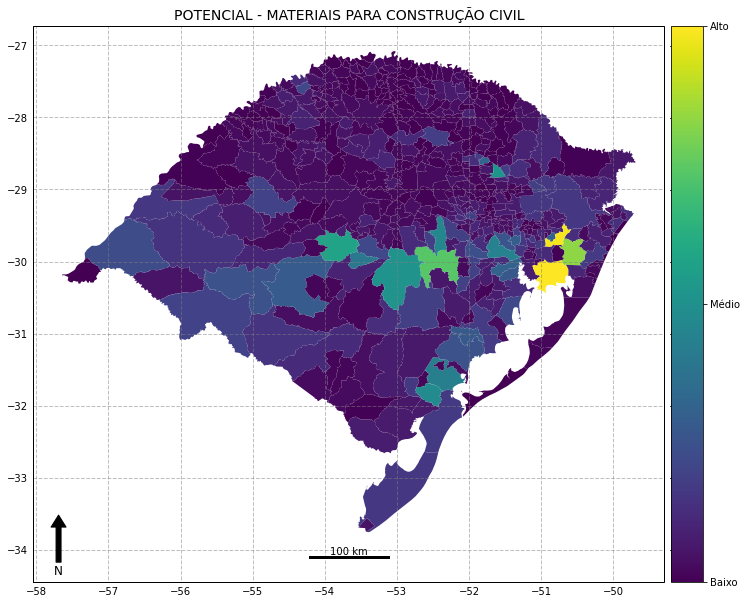

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

for grupo in grupos_m:
    print(grupo)
    fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
    municipios.plot(ax=ax, column=grupo, legend=False)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False

    divider = make_axes_locatable(ax)
    ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
    vmax = municipios[grupo].values.max()
    mappable = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=100))
    fig.add_axes(ax_cb)
    cbar = fig.colorbar(mappable, cax=ax_cb, ticks=[0, 50, 100])
    cbar.ax.set_yticklabels(['Baixo', 'Médio', 'Alto'])

    x, y, arrow_length = 0.04, 0.12, 0.1
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
    arrowprops=dict(facecolor='black', width=5, headwidth=15),
    ha='center', va='center', fontsize=12,
    xycoords=ax.transAxes)

    scale_bar(ax, 100, location=(0.5,0.01))

    ax.set_title('POTENCIAL - {}'.format(grupo.upper()), loc='center', fontsize='14')
    #fig.suptitle('Potencial - {}'.format(grupo), fontsize='14')
    
    #nome = mineral.replace('/', '')
    plt.savefig('imagens/potencial/'+grupo+".png", bbox_inches='tight', facecolor='white', dpi = 300)
    #plt.show()

Materiais para construção civil


C:\Users\robertomr\Documents\Python\WPy64-3760\python-3.7.6.amd64\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\robertomr\Documents\Python\WPy64-3760\python-3.7.6.amd64\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


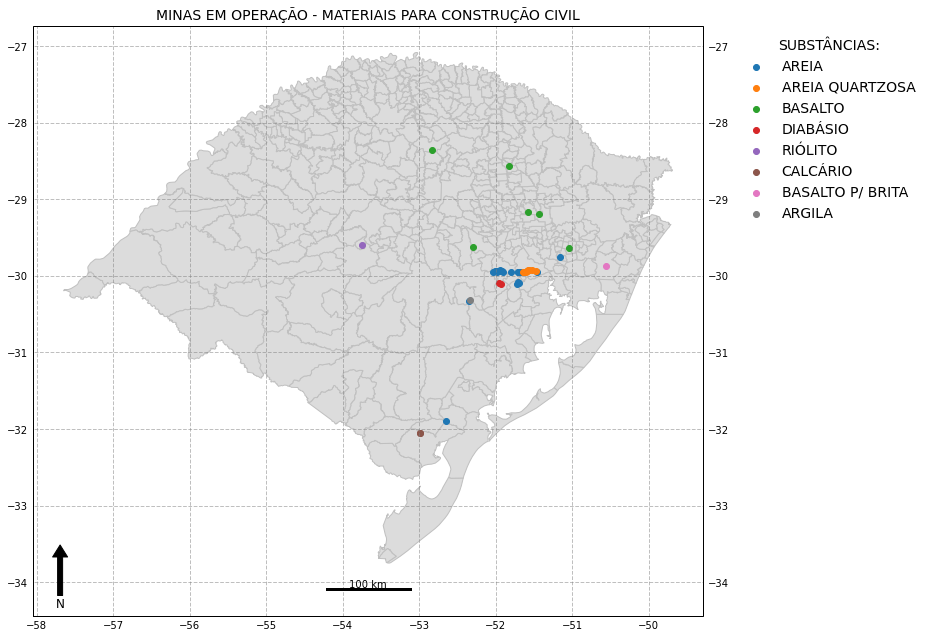

In [18]:
for grupo in grupos:
    f = grupos[grupo]['FASE'] == 'CONCESSÃO DE LAVRA'
    print(grupo)
    fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
    municipios.plot(ax=ax, color='gainsboro', edgecolor='silver')

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False

    gp = grupos[grupo][f]
    geometrias = gp['geometry'].to_crs("EPSG:4326")
    gp['centroids'] = geometrias.centroid
    #gp.plot(ax=ax, column='SUBS', legend=True)
    for sub in gp['SUBS'].unique():
        f_sub = gp['SUBS'] == sub
        x = [c.x for c in gp[f_sub]['centroids']]
        y = [c.y for c in gp[f_sub]['centroids']]
        ax.scatter(x, y, label=sub)

    x, y, arrow_length = 0.04, 0.12, 0.1
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
    arrowprops=dict(facecolor='black', width=5, headwidth=15),
    ha='center', va='center', fontsize=12,
    xycoords=ax.transAxes)

    scale_bar(ax, 100, location=(0.5,0.01))

    ax.set_title('MINAS EM OPERAÇÃO - {}'.format(grupo.upper()), loc='center', fontsize='14')
    #fig.suptitle('Potencial - {}'.format(grupo), fontsize='14')
    plt.legend(bbox_to_anchor=(1.04, 1), edgecolor = 'white', fontsize='14', title='SUBSTÂNCIAS:', title_fontsize='14')
    
    #nome = mineral.replace('/', '')
    plt.savefig('imagens/operacao/'+grupo+".png", bbox_inches='tight', facecolor='white', dpi = 300)
    #plt.show()